In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_info = pd.read_csv("/Users/arshkaur/Downloads/Airbnb Data Dictionary.csv",index_col='Field')

In [3]:
data_info.head()

,Description
Field,
id,Airbnb's unique identifier for the listing
listing_url,NaN
scrape_id,"Inside Airbnb ""Scrape"" this was part of"
last_scraped,"UTC. The date and time this listing was ""scrap..."
source,"One of ""neighbourhood search"" or ""previous scr..."


In [4]:
print(data_info.loc['id']['Description'])

Airbnb's unique identifier for the listing


In [5]:
def feat_info(col_name):
     '''Feed feature name as the argument. Returns the description of the feature.'''
     print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('source')

One of "neighbourhood search" or "previous scrape". "neighbourhood search" means that the listing was found by searching the city, while "previous scrape" means that the listing was seen in another scrape performed in the last 65 days, and the listing was confirmed to be still available on the Airbnb site.


## Exploratory Data Analysis (EDA)

In [7]:
df = pd.read_csv("/Users/arshkaur/Downloads/listings.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20843 entries, 0 to 20842
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            20843 non-null  int64  
 1   listing_url                                   20843 non-null  object 
 2   scrape_id                                     20843 non-null  int64  
 3   last_scraped                                  20843 non-null  object 
 4   source                                        20843 non-null  object 
 5   name                                          20843 non-null  object 
 6   description                                   20387 non-null  object 
 7   neighborhood_overview                         11112 non-null  object 
 8   picture_url                                   20843 non-null  object 
 9   host_id                                       20843 non-null 

In [9]:
df.head(4)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20240509032900,2024-05-09,previous scrape,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.06
1,8077,https://www.airbnb.com/rooms/8077,20240509032900,2024-05-09,previous scrape,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,...,4.90,4.92,4.83,NaN,f,2,1,1,0,0.94
2,273304,https://www.airbnb.com/rooms/273304,20240509032900,2024-05-09,previous scrape,In the heart of Toronto downtown!,NaN,NaN,https://a0.muscache.com/pictures/2756547/a098c...,1409872,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,288341,https://www.airbnb.com/rooms/288341,20240509032900,2024-05-09,city scrape,Beautiful Victorian Home,"Over 3500 sqft of living. Living room, dining ...","2 min walk to Sherbourne Subway station, free ...",https://a0.muscache.com/pictures/2993294/b82cd...,1368256,...,4.72,4.77,4.81,STR-2009-GXRRPH,f,1,1,0,0,0.36


In [10]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [11]:
df = df.drop(['host_id', 'host_since', 'id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url','host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'neighbourhood', 'latitude', 'longitude', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d', 'first_review', 'last_review', 'license', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'],axis=1)

In [12]:
df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,NaN,NaN,NaN,f,t,t,Little Portugal,NaN,Entire home,Entire home/apt,...,6,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,0.06
1,NaN,NaN,NaN,f,t,f,Waterfront Communities-The Island,NaN,Private room in rental unit,Private room,...,169,4.84,4.81,4.89,4.87,4.90,4.92,4.83,f,0.94
2,NaN,NaN,NaN,f,t,t,Church-Yonge Corridor,NaN,Private room in rental unit,Private room,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN
3,within a day,90%,42%,f,t,t,North St.James Town,NaN,Entire home,Entire home/apt,...,47,4.72,4.85,4.76,4.91,4.72,4.77,4.81,f,0.36
4,within a few hours,90%,42%,f,t,t,Waterfront Communities-The Island,NaN,Entire condo,Entire home/apt,...,42,4.79,4.79,4.79,4.64,4.76,4.86,4.67,f,0.26


In [13]:
df['price'].value_counts()

price
$100.00      307
$200.00      278
$150.00      272
$120.00      265
$80.00       247
            ... 
$435.00        1
$888.00        1
$895.00        1
$647.00        1
$1,451.00      1
Name: count, Length: 757, dtype: int64

In [14]:
df["price"] = df["price"].str.replace('$',' ')

In [15]:
df['price'] = df["price"].str.replace(',','')
df['price'] = df.price.apply(pd.to_numeric)

<Axes: xlabel='host_has_profile_pic', ylabel='count'>

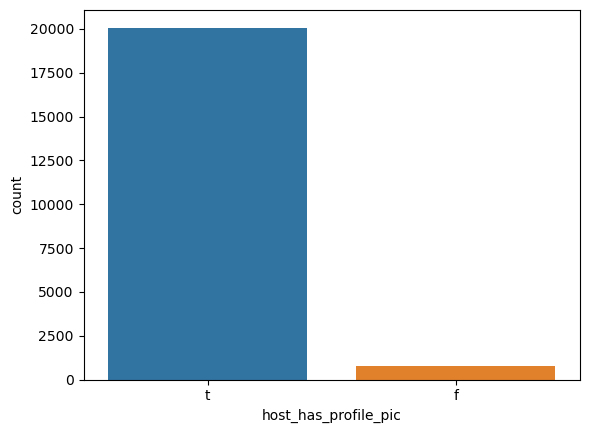

In [16]:
sns.countplot(data=df, x='host_has_profile_pic')

In [17]:
df['host_has_profile_pic'].value_counts()

host_has_profile_pic
t    20070
f      771
Name: count, dtype: int64

<Axes: xlabel='host_identity_verified', ylabel='count'>

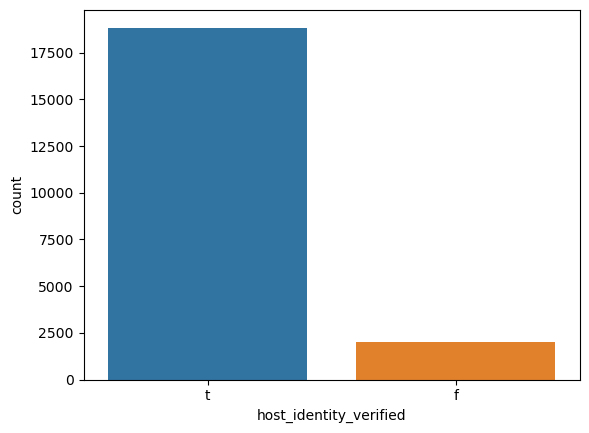

In [18]:
sns.countplot(data=df, x='host_identity_verified')

In [19]:
df['host_identity_verified'].value_counts()

host_identity_verified
t    18838
f     2003
Name: count, dtype: int64

In [20]:
## Percentage of null values of each feature
df.isnull().sum()/(len(df))*100

host_response_time               29.664636
host_response_rate               29.664636
host_acceptance_rate             25.812023
host_is_superhost                 1.875930
host_has_profile_pic              0.009596
host_identity_verified            0.009596
neighbourhood_cleansed            0.000000
neighbourhood_group_cleansed    100.000000
property_type                     0.000000
room_type                         0.000000
accommodates                      0.000000
bathrooms                        25.255481
bathrooms_text                    0.033584
bedrooms                          7.235043
beds                             25.361032
amenities                         0.000000
price                            25.241088
minimum_nights                    0.000000
maximum_nights                    0.000000
calendar_updated                100.000000
has_availability                  4.941707
availability_30                   0.000000
availability_60                   0.000000
availabilit

In [21]:
df = df.drop(['calendar_updated', 'neighbourhood_group_cleansed'], axis=1)

In [22]:
df = df.dropna(subset=['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'bathrooms_text'])

In [23]:
df.isnull().sum()/len(df) * 100

host_response_time             30.140873
host_response_rate             30.140873
host_acceptance_rate           26.198396
host_is_superhost               0.000000
host_has_profile_pic            0.000000
host_identity_verified          0.000000
neighbourhood_cleansed          0.000000
property_type                   0.000000
room_type                       0.000000
accommodates                    0.000000
bathrooms                      25.405987
bathrooms_text                  0.000000
bedrooms                        7.239288
beds                           25.484250
amenities                       0.000000
price                          25.405987
minimum_nights                  0.000000
maximum_nights                  0.000000
has_availability                5.018587
availability_30                 0.000000
availability_60                 0.000000
availability_90                 0.000000
availability_365                0.000000
number_of_reviews               0.000000
review_scores_ra

In [24]:
df = df.drop(['host_response_time', 'host_response_rate', 'host_acceptance_rate'], axis=1)

In [25]:
df = df.drop(['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_location', 'review_scores_value', 'review_scores_communication', 'reviews_per_month'], axis=1)

In [26]:
df.isnull().sum()/len(df) * 100

host_is_superhost          0.000000
host_has_profile_pic       0.000000
host_identity_verified     0.000000
neighbourhood_cleansed     0.000000
property_type              0.000000
room_type                  0.000000
accommodates               0.000000
bathrooms                 25.405987
bathrooms_text             0.000000
bedrooms                   7.239288
beds                      25.484250
amenities                  0.000000
price                     25.405987
minimum_nights             0.000000
maximum_nights             0.000000
has_availability           5.018587
availability_30            0.000000
availability_60            0.000000
availability_90            0.000000
availability_365           0.000000
number_of_reviews          0.000000
instant_bookable           0.000000
dtype: float64

In [27]:
df = df.dropna(subset=['bedrooms'])

In [28]:
df = df.drop(['bathrooms'], axis=1)

In [29]:
df.isnull().sum()/len(df) * 100

host_is_superhost          0.000000
host_has_profile_pic       0.000000
host_identity_verified     0.000000
neighbourhood_cleansed     0.000000
property_type              0.000000
room_type                  0.000000
accommodates               0.000000
bathrooms_text             0.000000
bedrooms                   0.000000
beds                      19.837587
amenities                  0.000000
price                     19.753217
minimum_nights             0.000000
maximum_nights             0.000000
has_availability           4.139422
availability_30            0.000000
availability_60            0.000000
availability_90            0.000000
availability_365           0.000000
number_of_reviews          0.000000
instant_bookable           0.000000
dtype: float64

In [30]:
def fill_beds(beds, bedrooms):
    """Accepts the beds and bedrooms values for the row.
    Checks if the beds is NaN , if so, it returns the avg beds value
    for the corresponding bedrooms value for that row.
    
    average beds here should be a Series or dictionary containing the mapping of the
    groupby averages of beds per bedrooms values."""
    if np.isnan(beds):
        return beds_per_bedroom[bedrooms]
    else:
        return beds

In [31]:
df['beds'] = df.apply(lambda x: fill_beds(x['bedrooms'], x['beds']), axis=1)

In [32]:
df = df.dropna(subset=['price'])

In [33]:
df = df.dropna(subset=['has_availability'])

In [34]:
df.isnull().sum()/len(df) * 100

host_is_superhost         0.0
host_has_profile_pic      0.0
host_identity_verified    0.0
neighbourhood_cleansed    0.0
property_type             0.0
room_type                 0.0
accommodates              0.0
bathrooms_text            0.0
bedrooms                  0.0
beds                      0.0
amenities                 0.0
price                     0.0
minimum_nights            0.0
maximum_nights            0.0
has_availability          0.0
availability_30           0.0
availability_60           0.0
availability_90           0.0
availability_365          0.0
number_of_reviews         0.0
instant_bookable          0.0
dtype: float64

### Feature Engineering

In [35]:
df['bathrooms_text'].head()

3         1.5 baths
4            1 bath
5     1 shared bath
7            1 bath
12           1 bath
Name: bathrooms_text, dtype: object

In [36]:
df['bathrooms_text'].value_counts()

bathrooms_text
1 bath               7972
2 baths              1960
1 shared bath        1749
1 private bath       1386
1.5 baths             683
2.5 baths             318
1.5 shared baths      263
2 shared baths        203
3 baths               200
3.5 baths             134
4.5 baths              42
4 baths                42
Half-bath              29
0 baths                24
0 shared baths         23
5 baths                13
2.5 shared baths       13
3 shared baths          9
5.5 baths               8
Shared half-bath        7
6 baths                 6
6.5 baths               4
8 baths                 3
4.5 shared baths        2
Private half-bath       2
4 shared baths          1
3.5 shared baths        1
7 shared baths          1
46 baths                1
Name: count, dtype: int64

In [37]:
def bath_type(bathroom):
    """This function returns a 1 if the bathroom_text string contains the word 
    string and 0 otherwise indicating a private bathroom """
    if "shared" in bathroom:
        return 1
    else:
        return 0

In [38]:
df['shared_baths'] = df['bathrooms_text'].apply(bath_type)

In [39]:
df['shared_baths'].value_counts()

shared_baths
0    12834
1     2265
Name: count, dtype: int64

In [40]:
df = df.drop('bathrooms_text', axis=1)

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='availability_365', ylabel='Count'>

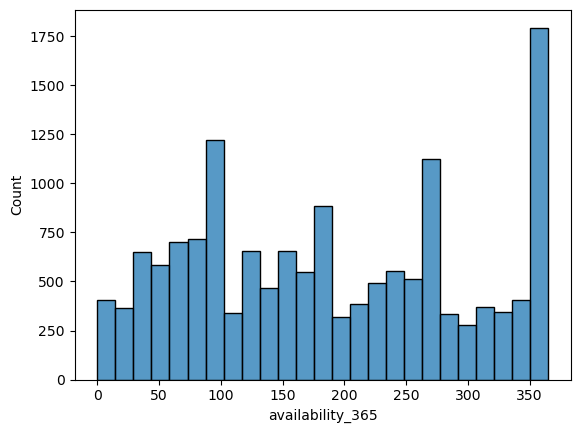

In [41]:
sns.histplot(data=df, x='availability_365')

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='availability_90', ylabel='Count'>

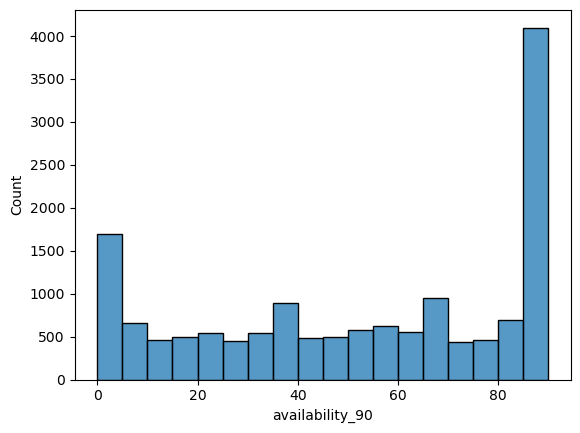

In [42]:
sns.histplot(data=df, x='availability_90')

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='availability_60', ylabel='Count'>

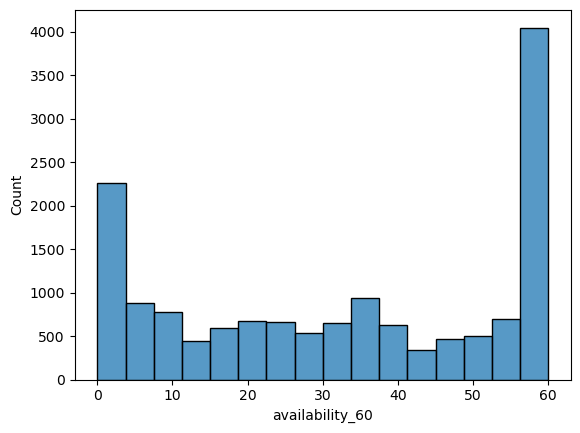

In [43]:
sns.histplot(data=df, x='availability_60')

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='availability_30', ylabel='Count'>

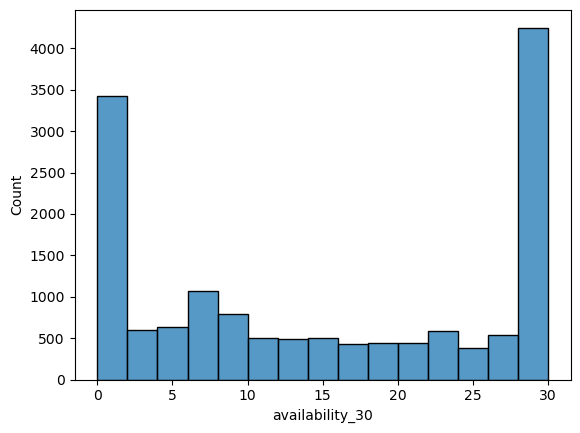

In [44]:
sns.histplot(data=df, x='availability_30')

In [45]:
df = df[df['availability_365'] > 0]
df = df[df['availability_365'] < 365]

In [46]:
df = df.drop(['availability_30', 'availability_60', 'availability_90', 'availability_365'], axis=1)


In [47]:
def has_availability_checker(row):
    if row =='t':
        return 1
    else:
        return 0

In [48]:
df['has_availability'] = df['has_availability'].apply(has_availability_checker)

In [49]:
df.select_dtypes(['object']).columns

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'amenities',
       'instant_bookable'],
      dtype='object')

In [50]:
df['host_is_superhost'].value_counts()

host_is_superhost
f    7910
t    6029
Name: count, dtype: int64

In [51]:
def super_host_checker(host):
    '''Returns a 0 if 'host_is_superhost == 'f', 1 otherwise '''
    if host == 'f':
        return 0
    else:
        return 1

In [52]:
df['host_is_superhost'] = df['host_is_superhost'].apply(super_host_checker)

In [53]:
df['host_is_superhost'].value_counts()

host_is_superhost
0    7910
1    6029
Name: count, dtype: int64

In [54]:
df['host_identity_verified'].value_counts()

host_identity_verified
t    13229
f      710
Name: count, dtype: int64

In [55]:
def host_verified_conversion(host):
    '''Returns a 1 if host_identity_verified =='t', 0 otherwise'''
    if host=='t':
        return 1
    else:
        return 0


In [56]:
df['host_identity_verified'] = df['host_identity_verified'].apply(host_verified_conversion)


In [57]:
df['host_identity_verified'].value_counts()

host_identity_verified
1    13229
0      710
Name: count, dtype: int64

In [58]:
df['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Waterfront Communities-The Island      2352
Niagara                                 534
Annex                                   427
Church-Yonge Corridor                   355
Dovercourt-Wallace Emerson-Junction     349
                                       ... 
Thorncliffe Park                         15
Forest Hill North                        14
Bridle Path-Sunnybrook-York Mills        14
Elms-Old Rexdale                         13
Kingsway South                           10
Name: count, Length: 140, dtype: int64

In [59]:
neighbourhood_value_counts = df['neighbourhood_cleansed'].value_counts()
to_remove = neighbourhood_value_counts[neighbourhood_value_counts > 20].index
df = df[df.neighbourhood_cleansed.isin(to_remove)]

In [60]:
df['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Waterfront Communities-The Island      2352
Niagara                                 534
Annex                                   427
Church-Yonge Corridor                   355
Dovercourt-Wallace Emerson-Junction     349
                                       ... 
Humber Heights-Westmount                 22
Broadview North                          22
Scarborough Village                      22
Morningside                              21
Humbermede                               21
Name: count, Length: 128, dtype: int64

In [61]:
neighbourhood_dummies= pd.get_dummies(df['neighbourhood_cleansed'], drop_first=True)

In [62]:
df = pd.concat([df.drop('neighbourhood_cleansed',axis=1),neighbourhood_dummies],axis=1)

In [63]:
df.shape

(13746, 143)

In [64]:
df['property_type'].value_counts()

property_type
Entire rental unit                    3267
Private room in home                  2884
Entire condo                          2377
Entire home                           2287
Private room in rental unit            650
Entire guest suite                     582
Private room in condo                  278
Private room in townhouse              226
Private room in bungalow               226
Entire townhouse                       176
Entire loft                            144
Private room in guest suite            128
Entire bungalow                        113
Entire guesthouse                       92
Shared room in home                     39
Private room in villa                   29
Entire serviced apartment               28
Shared room in rental unit              23
Private room in bed and breakfast       22
Room in boutique hotel                  18
Private room in guesthouse              13
Room in hotel                           13
Private room in loft                    

In [65]:
proprty_type_value_counts = df['property_type'].value_counts()
to_remove_property_type = proprty_type_value_counts[proprty_type_value_counts > 20].index
df = df[df.property_type.isin(to_remove_property_type)]

In [66]:
df['property_type'].value_counts()

property_type
Entire rental unit                   3267
Private room in home                 2884
Entire condo                         2377
Entire home                          2287
Private room in rental unit           650
Entire guest suite                    582
Private room in condo                 278
Private room in townhouse             226
Private room in bungalow              226
Entire townhouse                      176
Entire loft                           144
Private room in guest suite           128
Entire bungalow                       113
Entire guesthouse                      92
Shared room in home                    39
Private room in villa                  29
Entire serviced apartment              28
Shared room in rental unit             23
Private room in bed and breakfast      22
Name: count, dtype: int64

In [67]:
property_type_dummies = pd.get_dummies(df['property_type'], drop_first=True)

In [68]:
df = pd.concat([df.drop('property_type',axis=1),property_type_dummies],axis=1)

In [69]:
df['room_type'].value_counts()

room_type
Entire home/apt    9066
Private room       4443
Shared room          62
Name: count, dtype: int64

In [70]:
room_type_dummies = pd.get_dummies(df['room_type'], drop_first=True)


In [71]:

df= pd.concat([df.drop('room_type', axis=1), room_type_dummies], axis=1)


In [72]:
df['instant_bookable'].value_counts()


instant_bookable
f    10961
t     2610
Name: count, dtype: int64

In [73]:
def instant_bookable_checker(listing):
    """Returns a 1 if listing is instant bookable, otherwise 0"""
    if listing =='t':
        return 1
    else:
        return 0


In [74]:
df['instant_bookable'] = df['instant_bookable'].apply(instant_bookable_checker)


In [75]:

df['instant_bookable'].value_counts()

instant_bookable
0    10961
1     2610
Name: count, dtype: int64

In [76]:
def has_profile_pic_checker(pic):
    """Returns a 1 if host_has_profile_pic =='t", otherwise, returns 0"""
    if pic =='t':
        return 1
    else:
        return 0


In [77]:
df['host_has_profile_pic'] = df['host_has_profile_pic'].apply(has_profile_pic_checker)


In [78]:
df.select_dtypes(['object']).columns


Index(['amenities'], dtype='object')

In [79]:
df['amenities'].head(40)

3     ["Shampoo", "Sound system with Bluetooth and a...
4     ["Shampoo", "Electric stove", "Shared pool - a...
5     ["Cleaning available during stay", "Bathtub", ...
12    ["Bathtub", "Hair dryer", "Drying rack for clo...
13    ["Shampoo", "Exterior security cameras on prop...
17    ["Shampoo", "Hair dryer", "Keypad", "Free stre...
19    ["Babysitter recommendations", "Shampoo", "Bat...
21    ["Shampoo", "Hair dryer", "Dishwasher", "Smoke...
22    ["Shampoo", "Cleaning available during stay", ...
23    ["Shampoo", "Hair dryer", "Wifi", "Cooking bas...
24    ["Shampoo", "Bathtub", "Lock on bedroom door",...
25    ["Shampoo", "Hair dryer", "Keypad", "Iron", "M...
26    ["Lock on bedroom door", "Wifi", "Smoke alarm"...
27    ["Shampoo", "Bathtub", "Hair dryer", "Dishwash...
29    ["Shampoo", "Lock on bedroom door", "Hair drye...
30    ["Bathtub", "Smoke alarm", "Carbon monoxide al...
31    ["Hot water", "Wifi", "Backyard", "Kitchen", "...
32    ["Bathtub", "Hair dryer", "Ceiling fan", "

In [80]:
def elevator_checker(row):
    if 'elevator' in row.lower():
        return 1
    else:
        return 0

In [81]:
def dedicated_workspace_checker(row):
    if 'workspace' in row.lower():
        return 1
    else:
        return 0

In [82]:
def wifi_checker(row):
    """Checks to see if 'wifi' is listed in the ammeneties column. 
    Returns a 1 if True, Otherwise 0"""
    if 'wifi' in row.lower():
        return 1
    else:
        return 0


In [83]:
def gym_checker(row):
    '''Checks to see if 'gym' is listed in the ammeneties column. 
    Returns a 1 if True, Otherwise 0"""
    '''
    if "gym" in row.lower():
        return 1
    else:
        return 0

In [84]:
def long_term_checker(row):
    """Checks to see if 'long term stays allowed' is listed in the ammeneties column. 
    Returns a 1 if True, Otherwise 0"""
    if 'long term stays allow' in row.lower():
        return 1
    else:
        return 0


In [85]:
def parking_checker(row):
    '''Checks to see if 'parking' is listed in the ammeneties column. 
    Returns a 1 if True, Otherwise 0'''
    if 'parking' in row.lower():
        return 1
    else:
        return 0


In [86]:
def laundy_checker(row):
    if 'laundr' in row.lower():
        return 1
    else:
        return 0


In [87]:
def cable_checker(row):
    if 'cable' in row.lower():
        return 1
    else:
        return 0

In [88]:
df['elevator'] = df['amenities'].apply(elevator_checker)

In [89]:

df['wifi'] = df['amenities'].apply(wifi_checker)


In [90]:
df['wifi'].value_counts()

wifi
1    13478
0       93
Name: count, dtype: int64

In [91]:
df['gym'] = df['amenities'].apply(gym_checker)

In [92]:
df['gym'].value_counts()


gym
0    10970
1     2601
Name: count, dtype: int64

In [93]:
df['parking'] = df['amenities'].apply(parking_checker)


In [94]:

df['parking'].value_counts()


parking
1    10945
0     2626
Name: count, dtype: int64

In [95]:

df['long_term_stays_allowed'] = df['amenities'].apply(long_term_checker)


In [96]:
df['long_term_stays_allowed'].value_counts()


long_term_stays_allowed
1    7856
0    5715
Name: count, dtype: int64

In [97]:
df['dedicated_worksapce'] = df['amenities'].apply(dedicated_workspace_checker)


In [98]:

df['dedicated_worksapce'].value_counts()


dedicated_worksapce
1    9076
0    4495
Name: count, dtype: int64

In [99]:
df['laundry'] = df['amenities'].apply(laundy_checker)


In [100]:
df['laundry'].value_counts()


laundry
0    11250
1     2321
Name: count, dtype: int64

In [101]:
df['cable'] = df['amenities'].apply(cable_checker)


In [102]:
df['cable'].value_counts()


cable
0    12139
1     1432
Name: count, dtype: int64

In [103]:
df = df.drop('amenities', axis=1)


In [104]:
df.corr()['price'].sort_values()


Private room                  -0.250283
Private room in home          -0.198813
shared_baths                  -0.173286
Private room in rental unit   -0.075929
Private room in bungalow      -0.055224
                                 ...   
Entire home                    0.140676
beds                           0.304454
bedrooms                       0.304454
accommodates                   0.351814
price                          1.000000
Name: price, Length: 168, dtype: float64

In [105]:
df.shape

(13571, 168)

In [106]:
X = df.drop('price',axis=1)

In [107]:
y = df['price']

## Modelling

### Preprocessing: Using principal component analysis to reduce the dimensionality of the data

In [108]:
from sklearn.decomposition import PCA

In [109]:
from sklearn.preprocessing import StandardScaler


In [110]:
scaler = StandardScaler()


In [111]:
X_scaled = scaler.fit_transform(X)

In [112]:
def pca_plot(pca=5):
    """plot"""

    pca_X = PCA(n_components=pca)

    pca_X.fit(X_scaled)
    X_X = pca_X.transform(X_scaled)

    X_cumsum = np.cumsum(pca_X.explained_variance_ratio_ * 100)

    plt.plot(X_cumsum)
    plt.title(f'Principal Component analysis finding the {pca} most important features')
    plt.show()

    print(f'{X_cumsum} \n \n THe {pca} most important features contains\033[1m{X_cumsum[-1]:.2f} \033[0m% of the information in the features. \n')


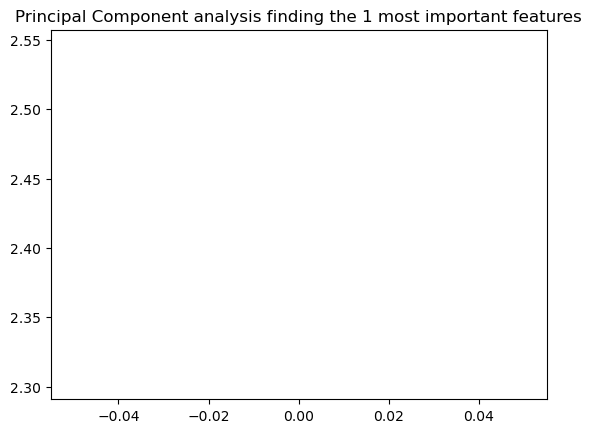

[2.42412873] 
 
 THe 1 most important features contains2.42 % of the information in the features. 



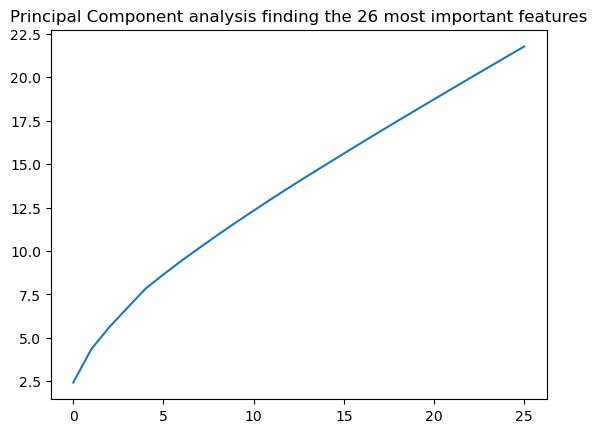

[ 2.42409414  4.34209079  5.61298933  6.72154986  7.82150414  8.64606901
  9.43478435 10.1810248  10.91758997 11.62764511 12.31994373 13.00755593
 13.67251904 14.32762588 14.96910926 15.60865641 16.24628834 16.87612872
 17.49870255 18.11544585 18.73158837 19.3452238  19.95687057 20.56442062
 21.17130839 21.77697671] 
 
 THe 26 most important features contains21.78 % of the information in the features. 



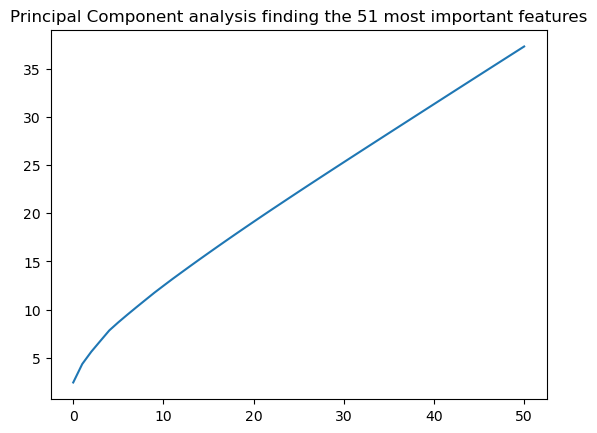

[ 2.42411367  4.34225095  5.61648248  6.72896958  7.8309669   8.66993088
  9.46176197 10.23416685 10.99273275 11.74791313 12.46110945 13.16682075
 13.85024764 14.53070476 15.20316571 15.86621097 16.5260801  17.1802794
 17.82853674 18.47040859 19.10841124 19.74232576 20.37117048 20.99395484
 21.61647619 22.23598549 22.85220369 23.46483566 24.07653143 24.68622518
 25.29398827 25.90067764 26.50592195 27.11031101 27.71380996 28.31695097
 28.91924346 29.52112056 30.12291387 30.72439427 31.32561737 31.92650072
 32.52717618 33.1271244  33.72667283 34.32608788 34.92466574 35.52244153
 36.11990083 36.71706436 37.31289981] 
 
 THe 51 most important features contains37.31 % of the information in the features. 



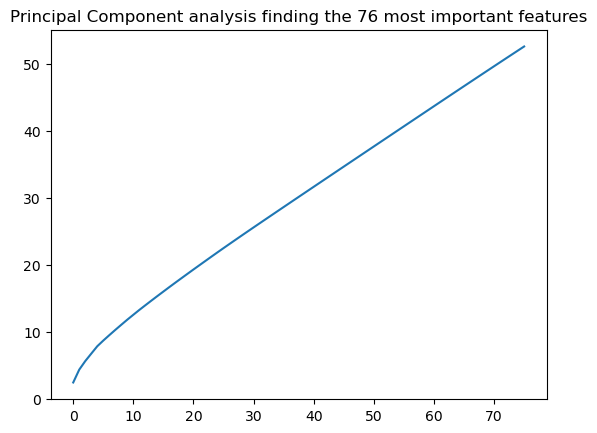

[ 2.4241243   4.34228663  5.6172786   6.73064429  7.83582458  8.68325774
  9.48809041 10.27734864 11.04683304 11.80782905 12.53696793 13.260651
 13.95785452 14.64748827 15.33051717 16.00423109 16.67616255 17.33959237
 17.9949011  18.64751021 19.2976336  19.94031501 20.58250761 21.22304512
 21.85809954 22.48860975 23.11247577 23.73387624 24.35299746 24.96771269
 25.57981503 26.19000685 26.79877857 27.40731503 28.01430709 28.62095644
 29.22715184 29.83242288 30.4366379  31.0405981  31.64445518 32.24773944
 32.85096566 33.45379782 34.05637012 34.65879102 35.26087382 35.86293172
 36.46482553 37.06665504 37.6681938  38.2696244  38.87092151 39.47214645
 40.07333142 40.67435678 41.27519777 41.87593793 42.47654065 43.07708789
 43.67718325 44.2770388  44.87598901 45.47450709 46.07226645 46.6692318
 47.26556387 47.86180933 48.45683137 49.05138885 49.645572   50.23801521
 50.82970839 51.42000675 52.00912958 52.59630132] 
 
 THe 76 most important features contains52.60 % of the information in the 

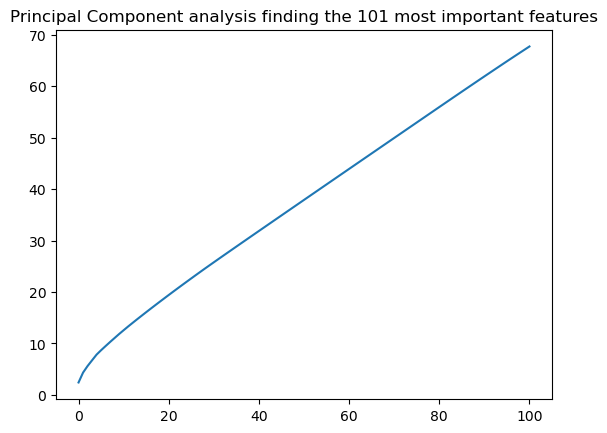

[ 2.42412603  4.34231189  5.61776255  6.73240497  7.83794903  8.69001016
  9.49969308 10.29277517 11.06760954 11.83909023 12.57354207 13.30324853
 14.00879891 14.70823814 15.39749996 16.08016382 16.75895881 17.42997537
 18.09767211 18.75878335 19.41761462 20.0725347  20.72117165 21.36588277
 22.00692474 22.644563   23.27905    23.90946983 24.53640077 25.15523655
 25.77078233 26.385056   26.99732255 27.60665276 28.21544177 28.82359711
 29.43107171 30.03767923 30.64398926 31.2491921  31.85398639 32.45840458
 33.06251978 33.66654503 34.27030518 34.87377509 35.4770291  36.08006874
 36.6829516  37.28572211 37.88825141 38.49071054 39.09316467 39.69545382
 40.29760615 40.89968321 41.50170947 42.10358716 42.70540569 43.30712716
 43.90875312 44.51030039 45.11180303 45.71321132 46.31459474 46.91591043
 47.51709984 48.11822    48.71930104 49.32029346 49.9212491  50.5221085
 51.12283265 51.72354481 52.32420704 52.92482759 53.52541121 54.1258578
 54.72626801 55.32659914 55.92665707 56.52567008 57.1

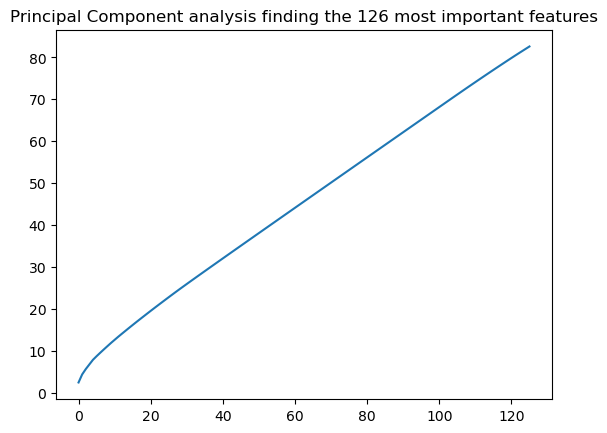

[ 2.42412807  4.34231741  5.6179579   6.73302648  7.83964726  8.69293485
  9.50548179 10.30352705 11.08537327 11.8593309  12.59830166 13.33506346
 14.04479673 14.74738063 15.44938587 16.13911221 16.82734102 17.50404693
 18.17563843 18.84552463 19.51314133 20.17392754 20.82911595 21.48021289
 22.12886543 22.77564149 23.41699959 24.05359497 24.68445267 25.30632752
 25.92686837 26.54370484 27.15877777 27.77298749 28.38487519 28.99522661
 29.60465572 30.21350389 30.82116988 31.42856807 32.03554891 32.64167845
 33.24727985 33.85240591 34.45710711 35.06154077 35.6658315  36.27004603
 36.87395903 37.47756812 38.08102965 38.68448104 39.28769998 39.89072226
 40.49367149 41.09651309 41.69920414 42.30178576 42.90428817 43.50659168
 44.10888252 44.71104792 45.31316282 45.91525361 46.51730971 47.11922395
 47.72110113 48.32292757 48.92468855 49.52639111 50.12807866 50.72974973
 51.33129724 51.93279334 52.534209   53.1355672  53.73684818 54.33803207
 54.93918951 55.54029511 56.14135046 56.7423644  57

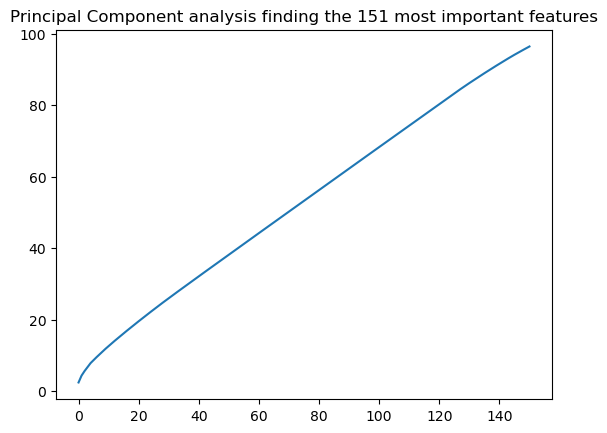

[ 2.42412883  4.34232289  5.61804761  6.73325674  7.84001812  8.69464307
  9.50860926 10.30736821 11.091014   11.86693154 12.60683671 13.34629265
 14.05872279 14.76309979 15.46637801 16.15892587 16.84944971 17.53096735
 18.20535522 18.87901731 19.54893997 20.21343266 20.87194449 21.52560602
 22.176676   22.82514781 23.47063505 24.10944099 24.74288258 25.36860257
 25.99071687 26.61024008 27.22789559 27.8436716  28.45764858 29.06990021
 29.68185295 30.29266513 30.90240017 31.51125093 32.11901328 32.72639467
 33.33299787 33.93887263 34.54438413 35.14960198 35.75456502 36.35943893
 36.96410303 37.56853204 38.17257111 38.77638718 39.38011872 39.9836055
 40.58699    41.19029521 41.79352459 42.39663102 42.99966558 43.6026412
 44.20547121 44.80823955 45.41084939 46.01339797 46.6159143  47.21840669
 47.82079852 48.42304316 49.02526121 49.62738608 50.22948257 50.83150384
 51.43344227 52.03535682 52.63724525 53.23901959 53.84075724 54.44240819
 55.04404954 55.64561863 56.24713377 56.84862465 57.4

ValueError: n_components=176 must be between 0 and min(n_samples, n_features)=167 with svd_solver='full'

In [113]:
# prints the explained variance of the most important principal components from the range 1 to 200 with steps of 25
for n in range(1,200,25):
    pca_plot(pca=n)

### MODEL 1

In [114]:
!pip install tensorflow

In [115]:
import tensorflow as tf

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
# we choose the standard scaler for the first iteration of our model
scaler = StandardScaler()

In [118]:
# we fit and transform our features (X) onto the scaler so that every feature maintains the same range with values mean centered at 0 with unit variance. 
# scaling the data reduces computational costs and makes it easier for our nueral network to find patterns between features during the training process.
X_scaled = scaler.fit_transform(X)


In [119]:
from sklearn.decomposition import PCA


In [120]:
pca_X = PCA(n_components=151)
pca_X = pca_X.fit_transform(X_scaled)

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test = train_test_split(pca_X,y, test_size=0.30)


In [123]:
X_train.shape


(9499, 151)

In [124]:
X_test.shape


(4072, 151)

In [125]:
# importing relevant libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [126]:
# 1. building the model
model = Sequential()

model.add(Dense(166,activation='relu'))

model.add(Dense(1))

In [127]:
# compiling the model
model.compile(optimizer='adam',loss='mse')

In [128]:
#training the model
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=128, epochs=100, verbose=0)


In [129]:
def loss_plot(model):
    '''Plots the training loss vs validation loss over each epoch.'''
    losses = pd.DataFrame(model.history.history)
    losses.plot()
    plt.title('Validation Loss vs Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Error')

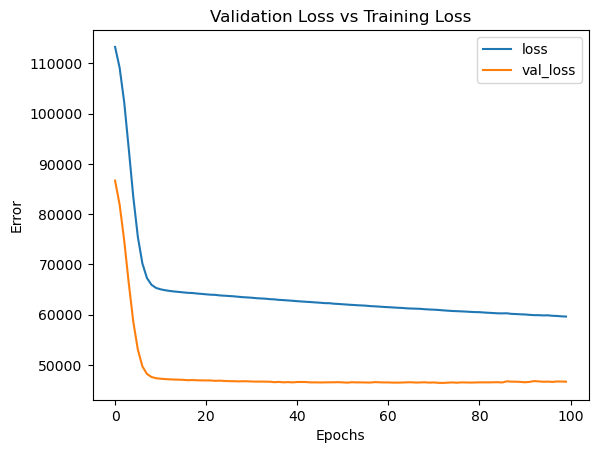

In [130]:
loss_plot(model)

In [131]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score


In [132]:
# making predictions for price on unseen data(X_test)
predictions = model.predict(X_test)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step


In [133]:
mae = mean_absolute_error(y_test, predictions)
mae


79.5936093945166

In [134]:
rmse = np.sqrt(mean_squared_error(y_test,predictions))
rmse

216.09418503716242

In [135]:
evs = explained_variance_score(y_test,predictions)
evs


0.1856604633908806

In [136]:
df['price'].mean()


186.32576818215313

In [137]:
df['price'].median()


130.0

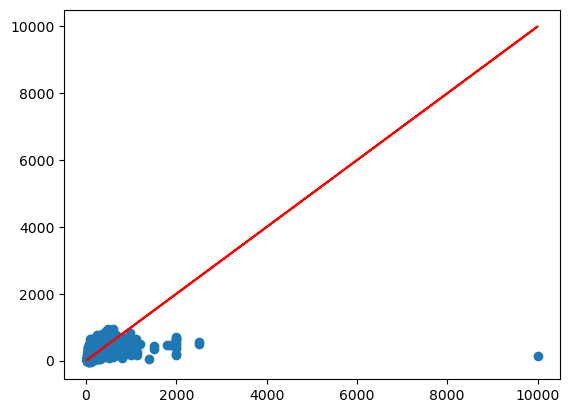

In [138]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')


In [139]:
errors = y_test.values.reshape(4072, 1) - predictions

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

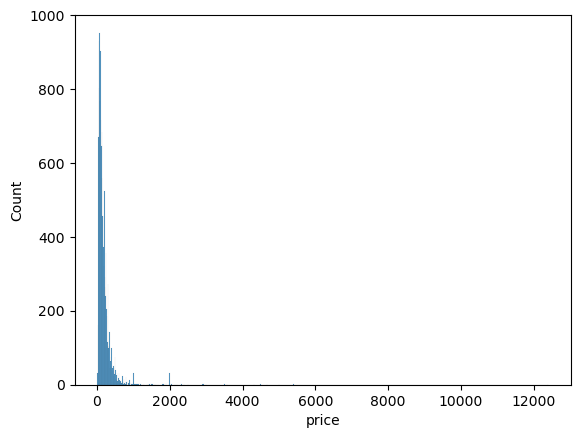

In [140]:
sns.histplot(data=df, x='price')

## MODEL 2

In [141]:
from sklearn.preprocessing import StandardScaler


In [142]:
scaler = StandardScaler()


In [143]:
X_scaled = scaler.fit_transform(X)


In [144]:
from sklearn.model_selection import train_test_split


In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.30)


In [146]:
X_train.shape

(9499, 167)

In [147]:
X_test.shape

(4072, 167)

In [148]:

pca_X = PCA(n_components=151)
pca_X = pca_X.fit_transform(X_scaled)


In [149]:
model_2 = Sequential()

model_2.add(Dense(175,activation='relu'))
model_2.add(Dense(88,activation='relu'))

model_2.add(Dense(1))

model_2.compile(optimizer='adam',loss='mse')

In [150]:
model_2.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size = 128,
          validation_data=(X_test, y_test),
          verbose=0
          
          )

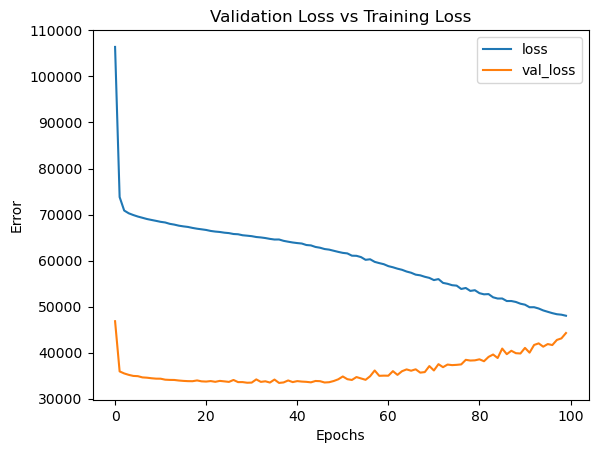

In [151]:
loss_plot(model_2)


In [152]:

predictions = model_2.predict(X_test)


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 298us/step


In [153]:
mae_2 = mean_absolute_error(y_test, predictions)
mae_2

109.16913719150313

In [154]:

rmse_2 = np.sqrt(mean_squared_error(y_test,predictions))
rmse_2

210.42074768121927

In [155]:
evs_2 = explained_variance_score(y_test,predictions)
evs_2

0.08955181567267834

In [156]:

df['price'].mean()

186.32576818215313

In [157]:
df['price'].median()


130.0

In [158]:
df['price'].std()


269.6475112215007

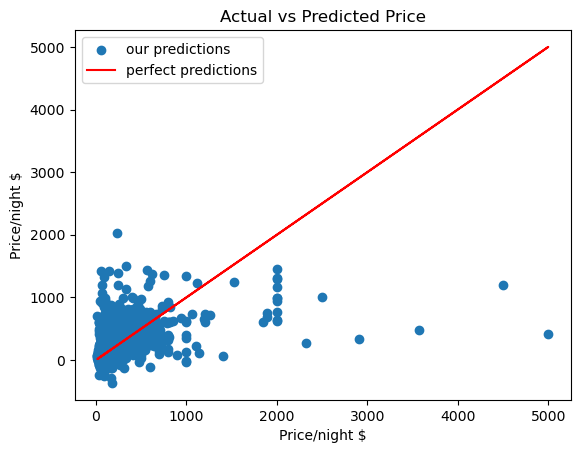

In [159]:
plt.scatter(y_test,predictions, label='our predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='perfect predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()


In [160]:
errors_2 = y_test.values.reshape(4072, 1) - predictions

/var/folders/cn/6sfwblsx1lqfm4vxk_cxr9th0000gn/T/ipykernel_19968/3930807623.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors_2)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


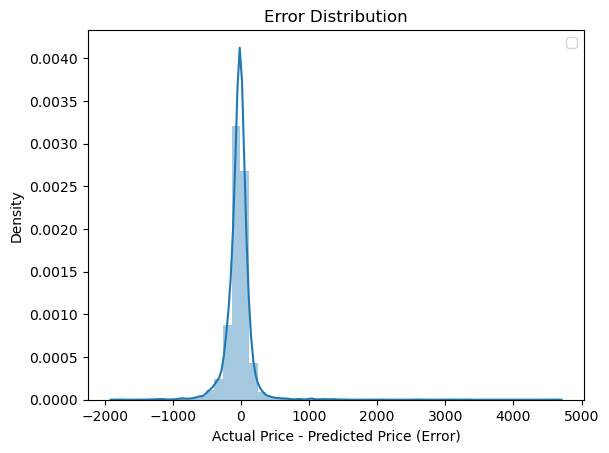

In [161]:
sns.distplot(errors_2)
plt.title('Error Distribution')
plt.xlabel('Actual Price - Predicted Price (Error)')
plt.legend()

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

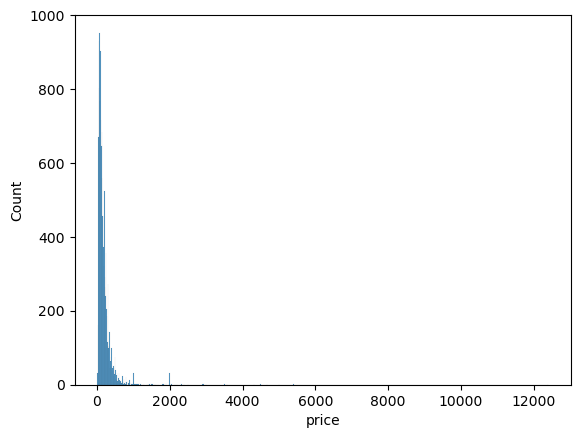

In [162]:
sns.histplot(data=df, x='price')


In [163]:
df = df[df['price'] <=600]


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

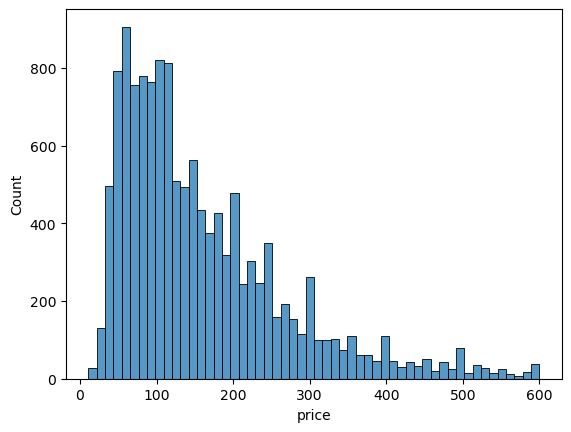

In [164]:
sns.histplot(data=df, x='price')


In [165]:
df['price'].mean()


159.89687759885084

In [166]:
df['price'].median()


129.0

In [167]:
df['price'].std()


109.86617147436938

In [168]:
X = df.drop('price', axis=1)
y = df['price']


In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [170]:

from sklearn.decomposition import PCA


In [171]:
pca_X = PCA(n_components=161)
pca_X = pca_X.fit_transform(X_scaled)


In [172]:
from sklearn.model_selection import train_test_split


In [173]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.30)


In [174]:
model_3 = Sequential()

model_3.add(Dense(175,activation='relu'))
model_3.add(Dense(88,activation='relu'))

model_3.add(Dense(1))

model_3.compile(optimizer='adam',loss='mse')

In [175]:
model_3.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size = 128,
          validation_data=(X_test, y_test),
          verbose=0
          
          )

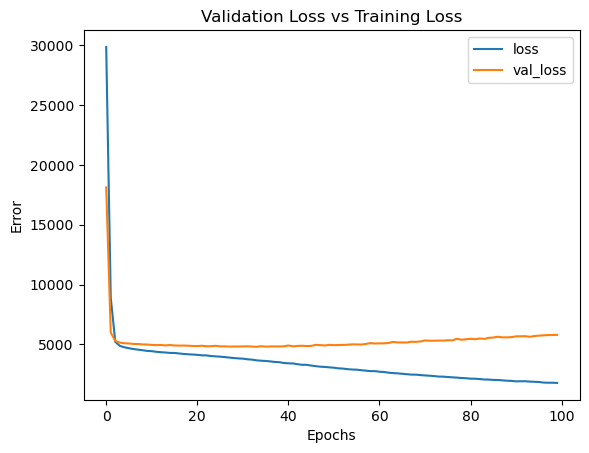

In [176]:
loss_plot(model_3)


In [177]:
predictions = model_3.predict(X_test)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step


In [178]:

mae_3 = mean_absolute_error(y_test, predictions)
mae_3

52.22236058387026

In [179]:
rmse_3 = np.sqrt(mean_squared_error(y_test,predictions))
rmse_3

76.17080152087368

In [180]:
df['price'].mean()


159.89687759885084

In [181]:
df['price'].median()


129.0

In [182]:
df['price'].std()


109.86617147436938

In [183]:
evs_3 = explained_variance_score(y_test,predictions)
evs_3


0.5339234202256188

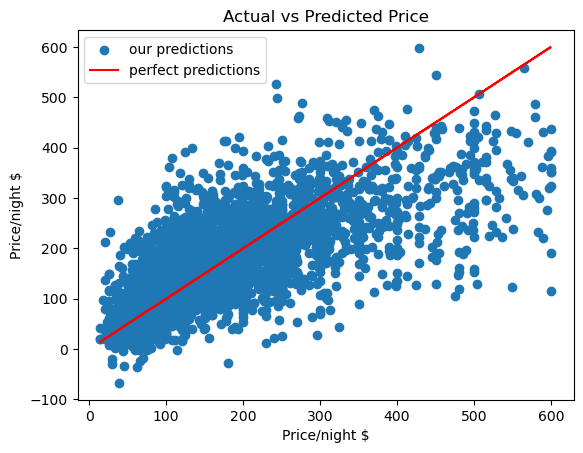

In [184]:
# Our predictions
plt.scatter(y_test,predictions, label='our predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='perfect predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [185]:
errors_3 = y_test.values.reshape(3969, 1) - predictions


/var/folders/cn/6sfwblsx1lqfm4vxk_cxr9th0000gn/T/ipykernel_19968/963653573.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors_3)
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

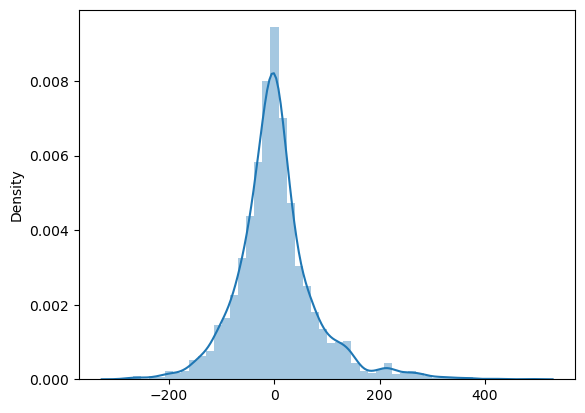

In [186]:
sns.distplot(errors_3)


## MODEL 4

In [187]:
pca_X = PCA(n_components=161)
pca_X = pca_X.fit_transform(X_scaled)


In [188]:
model_4 = Sequential()

model_4.add(Dense(175,activation='relu'))
model_4.add(Dense(88,activation='relu'))

model_4.add(Dense(1))

model_4.compile(optimizer='adam',loss='mse')

In [189]:
model_4.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size = 64, # batch size changed from 128 to 64
          validation_data=(X_test, y_test),
          verbose=0
          
          )

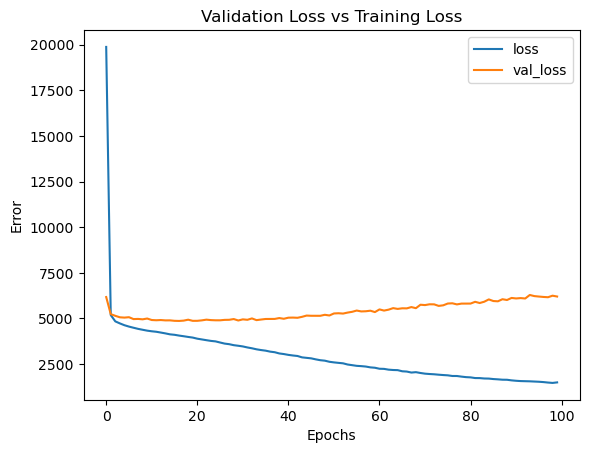

In [190]:
loss_plot(model_4)

In [191]:
predictions = model_4.predict(X_test)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step


In [192]:
mae_4 = mean_absolute_error(y_test, predictions)
mae_4

54.843859862638496

In [193]:
rmse_4 = np.sqrt(mean_squared_error(y_test, predictions))
rmse_4


78.74364389697723

In [194]:
df['price'].mean()


159.89687759885084

In [195]:
df['price'].median()


129.0

In [196]:
df['price'].std()


109.86617147436938

In [197]:

evs_4 = explained_variance_score(y_test, predictions)
evs_4


0.5022888611701181

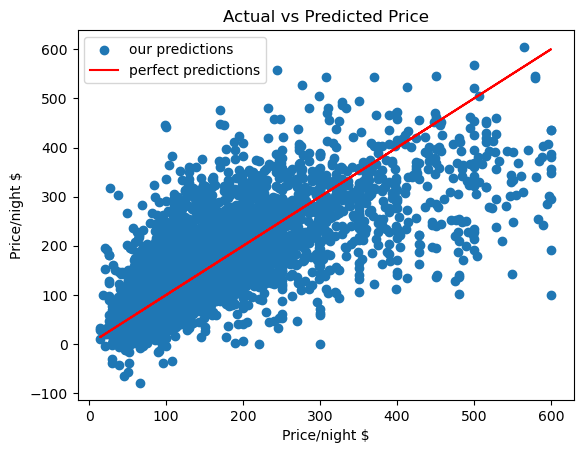

In [198]:
# Our predictions
plt.scatter(y_test,predictions, label='our predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='perfect predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [199]:
errors_4 = y_test.values.reshape(3969, 1) - predictions


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


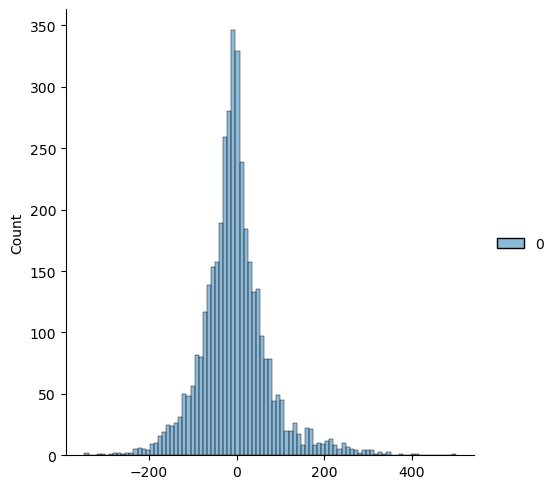

In [200]:
sns.displot(errors_4)


## MODEL 5

In [201]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [202]:
from sklearn.decomposition import PCA


In [203]:
pca_X = PCA(n_components=161)
pca_X = pca_X.fit_transform(X_scaled)

In [204]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size=0.30)


In [205]:
model_5 = Sequential()

model_5.add(Dense(175,activation='relu'))
model_5.add(Dropout(0.20))
model_5.add(Dense(88,activation='relu'))
model_5.add(Dropout(0.20))

model_5.add(Dense(1))

model_5.compile(optimizer='adam',loss='mse')


In [206]:
model_5.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size = 64,
          validation_data=(X_test, y_test),
          verbose=0
          
          )

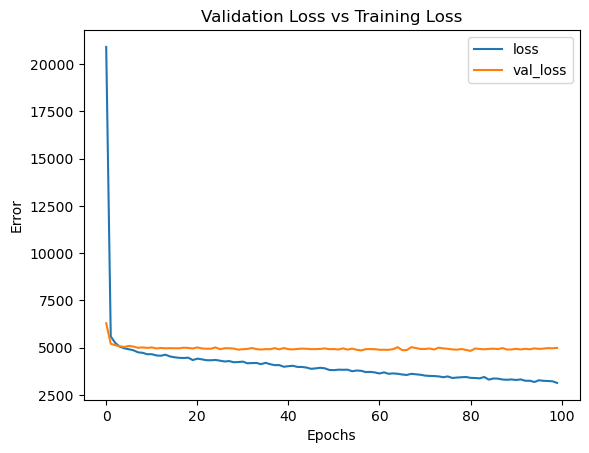

In [207]:
loss_plot(model_5)

In [208]:
predictions = model_5.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step


In [209]:
mae_5 = mean_absolute_error(y_test,predictions)
mae_5


48.852346035358316

In [210]:
rmse_5 = np.sqrt(mean_squared_error(y_test, predictions))
rmse_5

70.6203874737621

In [211]:
df['price'].mean()

159.89687759885084

In [212]:
df['price'].median()

129.0

In [213]:
evs_5 = explained_variance_score(y_test, predictions)
evs_5

0.5978207188262463

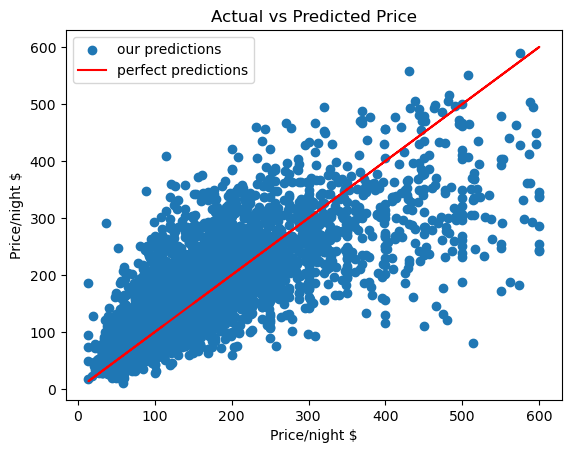

In [214]:
# Our predictions
plt.scatter(y_test,predictions, label='our predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='perfect predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()


In [215]:
errors_5 = y_test.values.reshape(3969, 1) - predictions

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


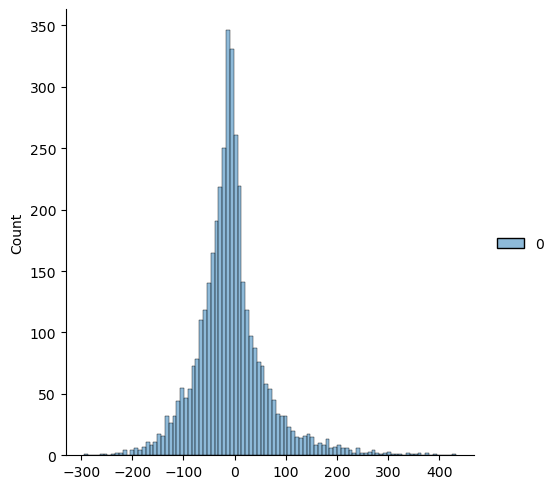

In [216]:
sns.displot(errors_5)

## MODEL 6

In [217]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [218]:
model_6 = Sequential()

model_6.add(Dense(175,activation='relu'))
model_6.add(Dropout(0.20))


model_6.add(Dense(88,activation='relu'))
model_6.add(Dropout(0.20))

model_6.add(Dense(1))

model_6.compile(optimizer='adam',loss='mse')

In [219]:
model_6.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 64,
          validation_data=(X_test, y_test),
          verbose=0
          
          )

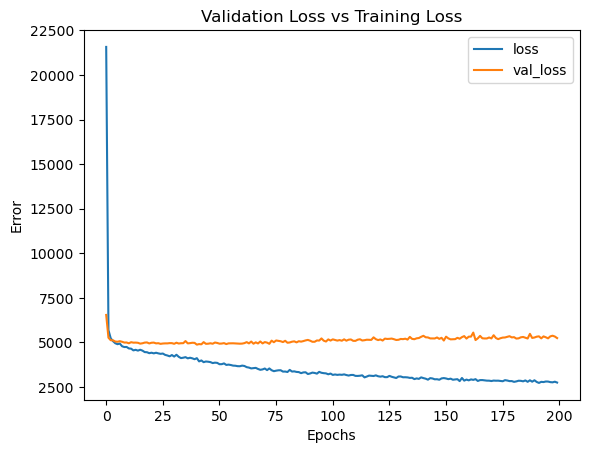

In [220]:
loss_plot(model_6)

In [221]:
predictions = model_6.predict(X_test)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step


In [222]:

mae_6 = mean_absolute_error(y_test, predictions)
mae_6


48.95209904250464

In [223]:
rmse_6 = np.sqrt(mean_squared_error(y_test, predictions))
rmse_6


72.40441073746258

In [224]:
evs_6 = explained_variance_score(y_test, predictions)
evs_6

0.5731840070220235

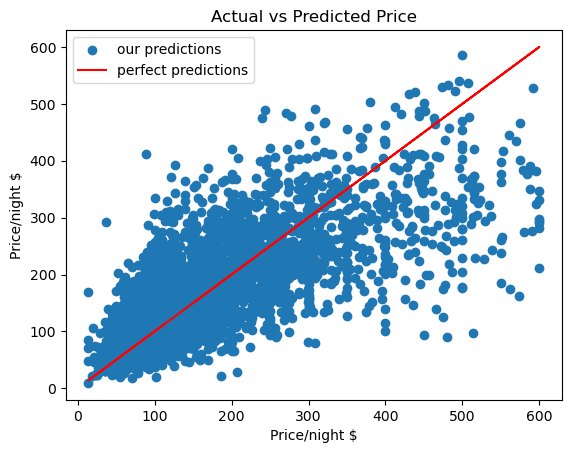

In [225]:
# Our predictions
plt.scatter(y_test,predictions, label='our predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='perfect predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()


In [226]:
errors_6 = y_test.values.reshape(3969, 1) - predictions

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


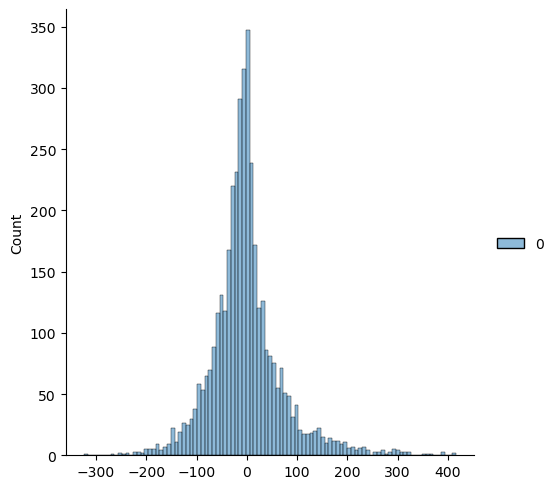

In [227]:
sns.displot(errors_6)

## MODEL 7

In [228]:
model_7 = Sequential()

model_7.add(Dense(175,activation='relu'))
model_7.add(Dropout(0.20))


model_7.add(Dense(88,activation='relu'))
model_7.add(Dropout(0.20))

model_7.add(Dense(1))

model_7.compile(optimizer='adam',loss='mse')

In [229]:
model_7.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 64,
          validation_data=(X_test, y_test),
          verbose=0
          )


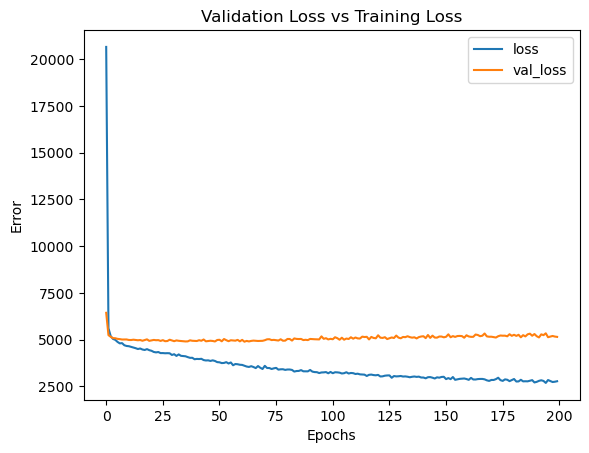

In [230]:
loss_plot(model_7)

In [231]:
predictions = model_7.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step


In [232]:
mae_7 = mean_absolute_error(y_test, predictions)
mae_7

49.36651904086197

In [233]:
rmse_7 = np.sqrt(mean_squared_error(y_test, predictions))
rmse_7

71.74426094317302

In [234]:
evs_7 = explained_variance_score(y_test, predictions)
evs_7

0.5844613532618268

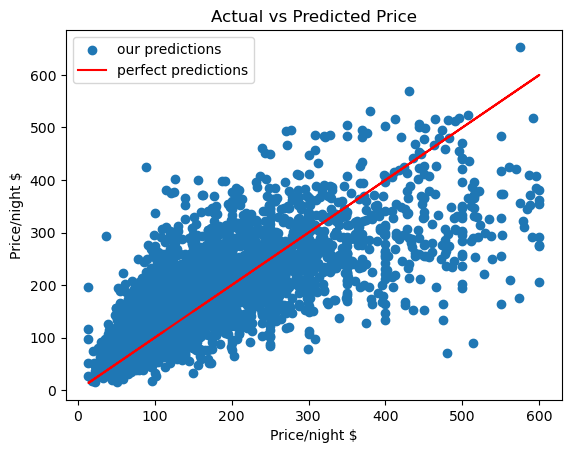

In [235]:
# Our predictions
plt.scatter(y_test,predictions, label='our predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='perfect predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [236]:
errors_7 = y_test.values.reshape(3969, 1) - predictions

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


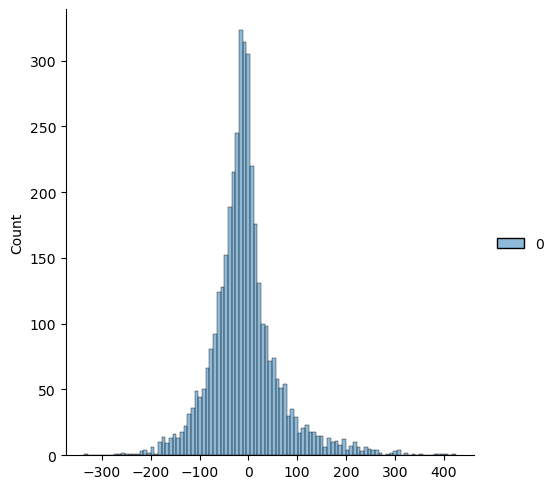

In [237]:
sns.displot(errors_7)

## MODEL 8

In [238]:
# Removing the hidden layer
model_8 = Sequential()

model_8.add(Dense(175,activation='relu'))
model_8.add(Dropout(0.20))

model_8.add(Dense(1))

model_8.compile(optimizer='adam',loss='mse')

In [239]:
model_8.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 64,
          validation_data=(X_test, y_test),
          verbose=0)


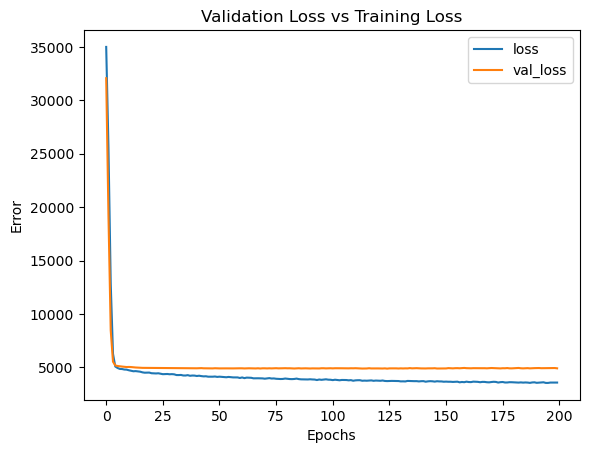

In [240]:
loss_plot(model_8)

In [241]:
predictions = model_8.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step


In [242]:
mae_8 = mean_absolute_error(y_test, predictions)
mae_8

47.55379438916872

In [243]:
rmse_8 = np.sqrt(mean_squared_error(y_test, predictions))
rmse_8

70.15674353608105

In [244]:
evs_8 = explained_variance_score(y_test, predictions)
evs_8

0.5993623227406379

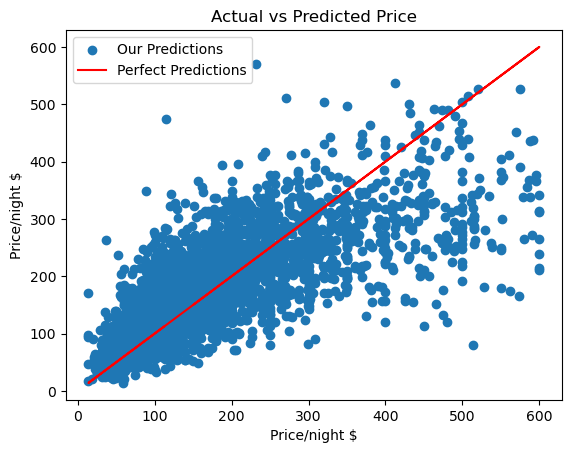

In [245]:
# Our predictions
plt.scatter(y_test,predictions, label='Our Predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='Perfect Predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [246]:
errors_8 = y_test.values.reshape(3969, 1) - predictions

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


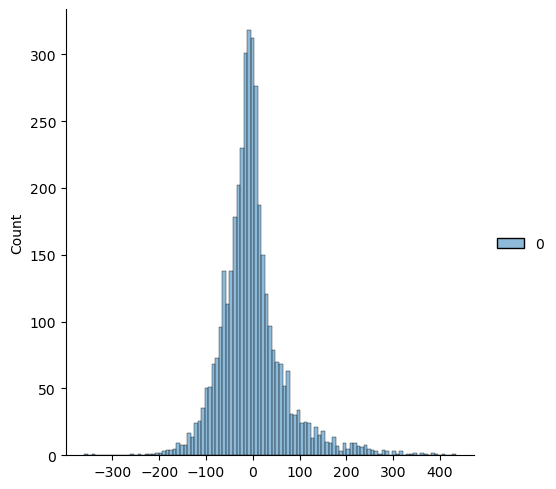

In [247]:
sns.displot(errors_8)

## MODEL 9

In [248]:
model_9 = Sequential()

model_9.add(Dense(175,activation='relu'))
model_9.add(Dropout(0.20))

model_9.add(Dense(1))

model_9.compile(optimizer='adam',loss='mse')

In [249]:
model_9.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 32,
          validation_data=(X_test, y_test),
          verbose=0)

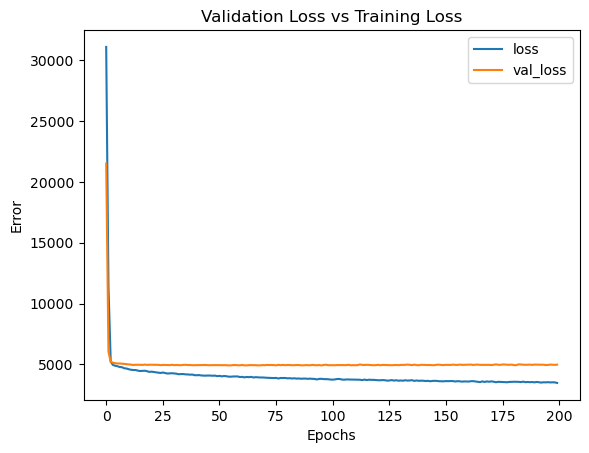

In [250]:
loss_plot(model_9)

In [251]:
predictions = model_9.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step


In [252]:
mae_9 = mean_absolute_error(y_test, predictions)
mae_9

47.86547235434588

In [253]:
rmse_9 = np.sqrt(mean_squared_error(y_test, predictions))
rmse_9

70.48535517133305

In [254]:
df['price'].mean()

159.89687759885084

In [255]:
df['price'].median()

129.0

In [256]:
df['price'].std()

109.86617147436938

In [257]:
evs_9 = explained_variance_score(y_test, predictions)
evs_9

0.5961059316657462

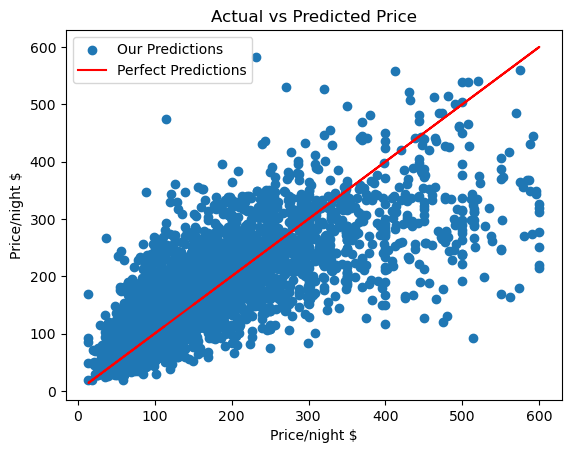

In [258]:
# Our predictions
plt.scatter(y_test,predictions, label='Our Predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='Perfect Predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [259]:
errors_9 = y_test.values.reshape(3969, 1) - predictions

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


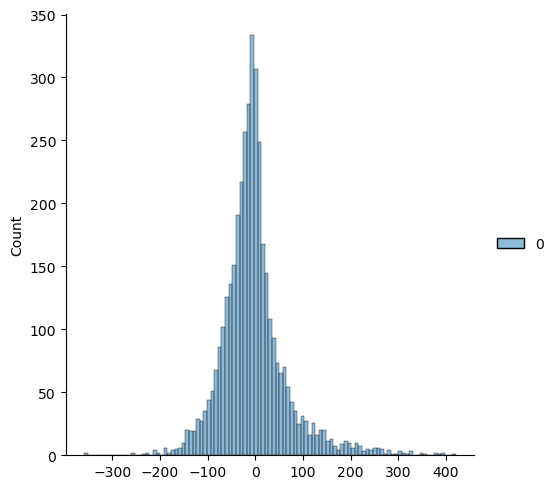

In [260]:
sns.displot(errors_9)

## MODEL 10

In [261]:
model_10 = Sequential()

model_10.add(Dense(175,activation='sigmoid')) # replacing relu with sigmoid
model_10.add(Dropout(0.20))

model_10.add(Dense(1))

model_10.compile(optimizer='adam',loss='mse')

In [262]:
model_10.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 32,
          validation_data=(X_test, y_test),
          verbose=0)

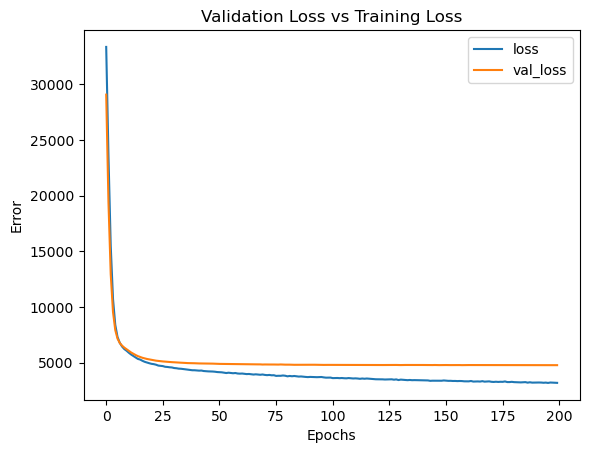

In [263]:
loss_plot(model_10)

In [264]:
predictions = model_10.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step


In [265]:
mae_10 = mean_absolute_error(y_test, predictions)
mae_10

46.94070818587015

In [266]:
rmse_10 = np.sqrt(mean_squared_error(y_test, predictions))
rmse_10

69.05164213349299

In [267]:
df['price'].mean()

159.89687759885084

In [268]:
df['price'].median()


129.0

In [269]:
df['price'].std()


109.86617147436938

In [270]:
evs_10 = explained_variance_score(y_test, predictions)


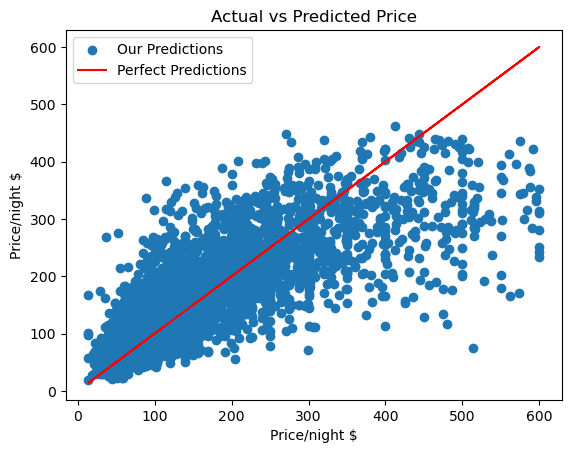

In [271]:
# Our predictions
plt.scatter(y_test,predictions, label='Our Predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='Perfect Predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [272]:
errors_10 = y_test.values.reshape(3969, 1) - predictions

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


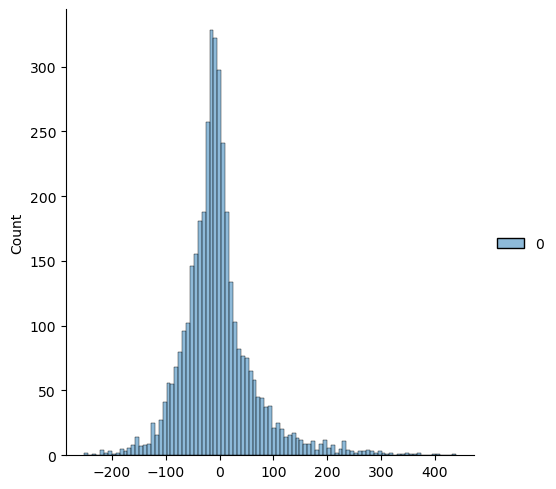

In [273]:
sns.displot(errors_10)

## MODEL 11

##### replacing the standard scaler with a robust scaler to reduce the impact of outliers.

##### This happens because the feature vectors are transformed by substracting the median and then dividing by the IQR instead of the standard deviation that occurs in sklearn's StandardScaler

In [274]:
model_11 = Sequential()

model_11.add(Dense(175,activation='sigmoid'))
model_11.add(Dropout(0.20))

model_11.add(Dense(1))

model_11.compile(optimizer='adam',loss='mse')

In [275]:
model_11.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 32,
          validation_data=(X_test, y_test),
          verbose=0)

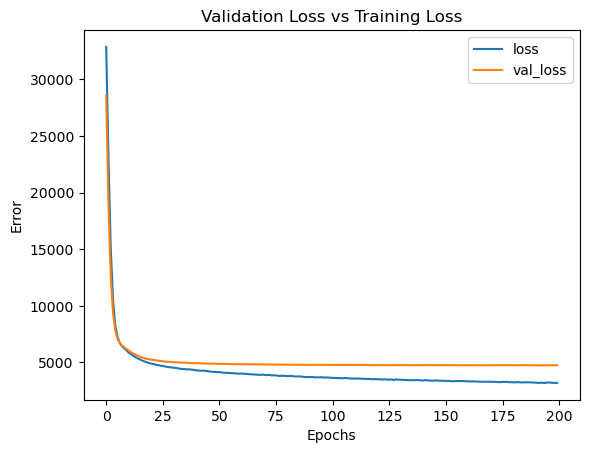

In [276]:
loss_plot(model_11)

In [277]:
predictions = model_11.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step


In [278]:
mae_11 = mean_absolute_error(y_test, predictions)
mae_11

46.97510593055808

In [279]:
rmse_11 = np.sqrt(mean_squared_error(y_test, predictions))
rmse_11

68.90441939865374

In [280]:
evs_11 = explained_variance_score(y_test, predictions)
evs_11

0.6142615900436308

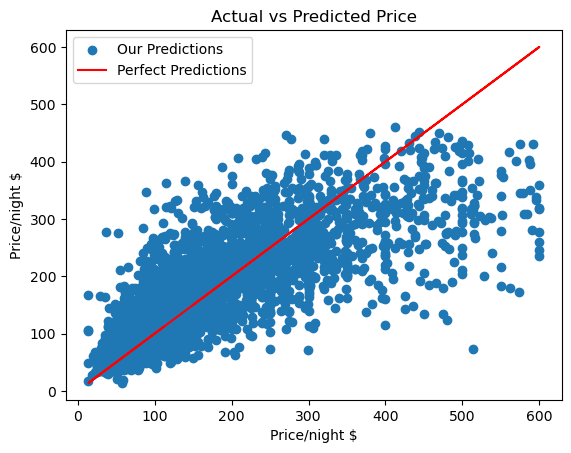

In [281]:
# Our predictions
plt.scatter(y_test,predictions, label='Our Predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='Perfect Predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [282]:
errors_11 = y_test.values.reshape(3969, 1) - predictions

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 9.444444444444438, 'Error')

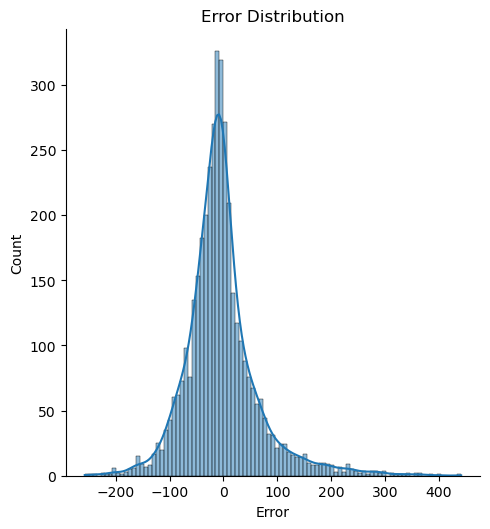

In [283]:
sns.displot(errors_11,legend=False,kde=True)
plt.title('Error Distribution')
plt.xlabel("Error")

## MODEL 12

In [284]:
model_12 = Sequential()

model_12.add(Dense(175,activation='relu'))
model_12.add(Dropout(0.20))

model_12.add(Dense(1))

model_12.compile(optimizer='adam',loss='mse')

In [285]:
model_12.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 32,
          validation_data=(X_test, y_test),
          verbose=0)

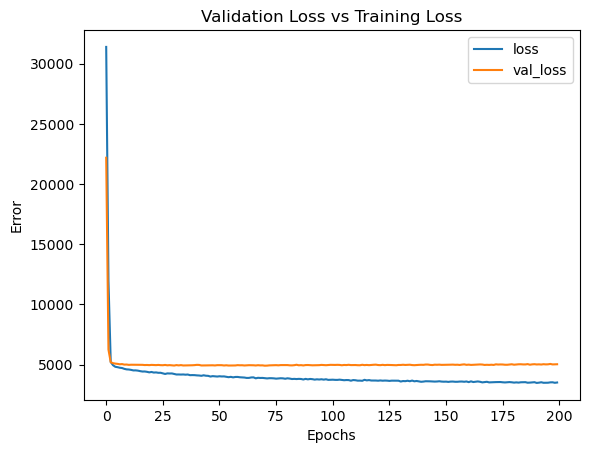

In [286]:
loss_plot(model_12)

In [287]:
predictions = model_12.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step


In [288]:
mae_12 = mean_absolute_error(y_test, predictions)

In [289]:
rmse_12 = np.sqrt(mean_squared_error(y_test, predictions))

In [290]:
evs_12 = explained_variance_score(y_test, predictions)

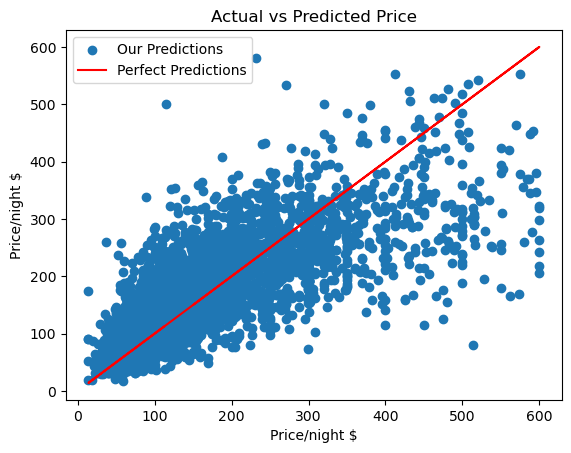

In [291]:
# Our predictions
plt.scatter(y_test,predictions, label='Our Predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='Perfect Predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [292]:
errors_12 = y_test.values.reshape(3969, 1) - predictions

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


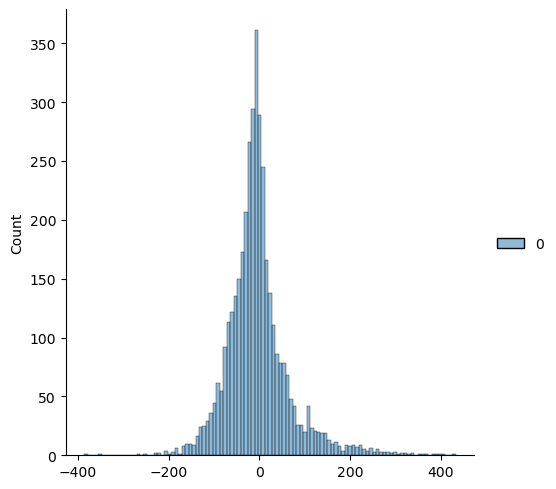

In [293]:
sns.displot(errors_12)

## MODEL 13

In [294]:
model_13 = Sequential()

model_13.add(Dense(175,activation='relu'))
model_13.add(Dropout(0.20))

model_13.add(Dense(1))

model_13.compile(optimizer='adam',loss='mse')

In [295]:
model_13.fit(x=X_train, 
          y=y_train, 
          epochs=200,
          batch_size = 32,
          validation_data=(X_test, y_test),
          verbose=13)

Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

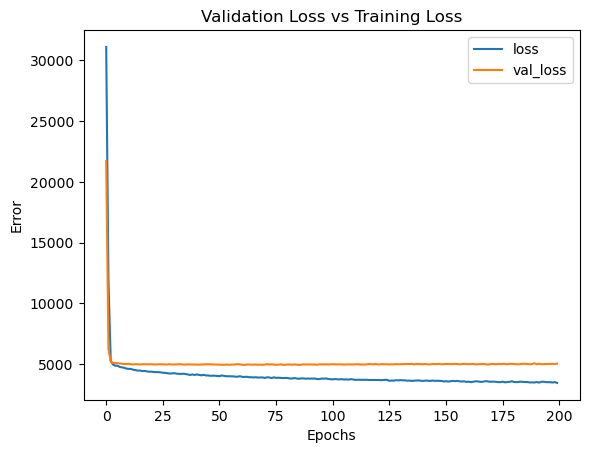

In [296]:
loss_plot(model_13)

In [297]:
predictions = model_13.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step


In [298]:
mae_13 = mean_absolute_error(y_test, predictions)
mae

79.5936093945166

In [299]:
rmse_13 = np.sqrt(mean_squared_error(y_test, predictions))

In [300]:
evs_13 = explained_variance_score(y_test, predictions)

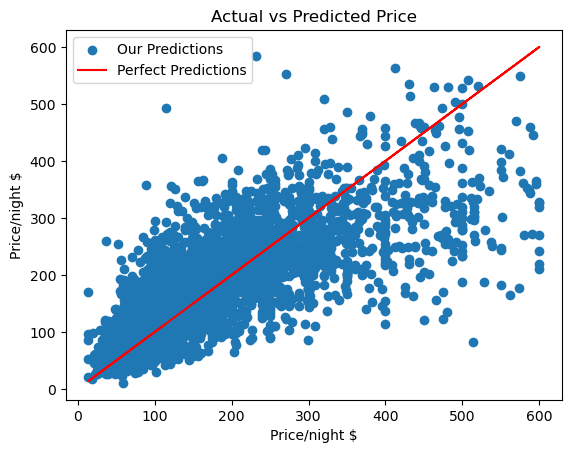

In [301]:
# Our predictions
plt.scatter(y_test,predictions, label='Our Predictions')

# Perfect predictions
plt.plot(y_test,y_test,c='r', label='Perfect Predictions')
plt.title("Actual vs Predicted Price")
plt.xlabel('Price/night $')
plt.ylabel('Price/night $')
plt.legend()

In [302]:
errors_13 = y_test.values.reshape(3969, 1) - predictions

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


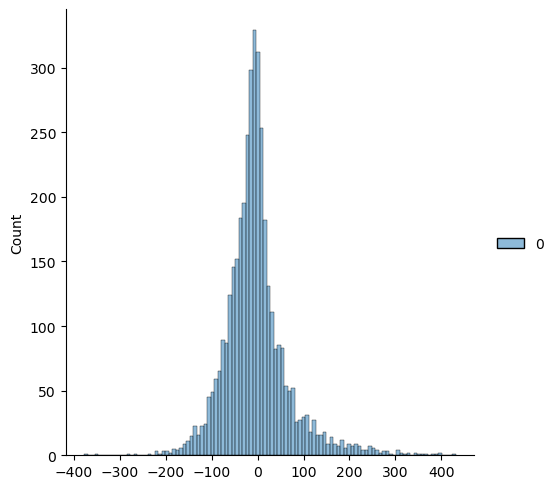

In [303]:
sns.displot(errors_13)

### Final Evaluation/ Comparing Results

##### Reducing the test size from 30% of the data to 20% resulted in slightly better model performance in model 13 compared to model 12 with a rmse of ~$65 per night and an explained variance score of ~68%

##### It appears that an underlying theme with our models is that we systematically underpredict the prices of higher-price listings (about > $300 per night).

##### This could be due to some features in the error term not present in our model that appear in higher-priced listings

In [304]:
model_results = [
["model_1", mae, rmse, evs],
["model_2", mae_2, rmse_2, evs_2],
["model_3", mae_3, rmse_3, evs_3],
["model_4", mae_4, rmse_4, evs_4],
["model_5", mae_5, rmse_5, evs_5],
["model_6", mae_6, rmse_6, evs_6],
["model_7", mae_7, rmse_7, evs_7],
["model_8", mae_8, rmse_8, evs_8],
["model_9", mae_9, rmse_9, evs_9],
["model_10", mae_10, rmse_10, evs_10],
["model_11", mae_11, rmse_11, evs_11],
["model_12", mae_12, rmse_12, evs_12],
["model_13", mae_13, rmse_13, evs_13]
]

In [305]:
framed_results = pd.DataFrame(model_results, columns=['model', 'mae', 'rmse', 'evs'])
framed_results

,model,mae,rmse,evs
0,model_1,79.593609,216.094185,0.185660
1,model_2,109.169137,210.420748,0.089552
2,model_3,52.222361,76.170802,0.533923
3,model_4,54.843860,78.743644,0.502289
4,model_5,48.852346,70.620387,0.597821
5,model_6,48.952099,72.404411,0.573184
6,model_7,49.366519,71.744261,0.584461
7,model_8,47.553794,70.156744,0.599362
8,model_9,47.865472,70.485355,0.596106
9,model_10,46.940708,69.051642,0.612324


##### After training and evaluating all iterations of the model on our key metrics, model_11 has the best performance. the scaler in model_11 was changed from a learns StandardScaler to a RobustScaler to test the performance when the impact of outliers in our data was reduced. This resulted in a slightly lower root mean squared error, from ~65 per night compared to model_10.

In [306]:
model_11.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 175)            │        28,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 175)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           176 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,580 (334.30 KB)

 Trainable params: 28,526 (111.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 57,054 (222.87 KB)